# Tasks

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

* Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the * square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.
* Clean the data. Filter out the following patient segments that represent incorrect data:
    * diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    * height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    * height is more than the 97.5th percentile
    * weight is less than the 2.5th percentile
    * weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

Any time a variable is set to None, make sure to set it to the correct code.

Unit tests are written for you under test_module.py.

## Instructions
By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

1. Import the data from medical_examination.csv and assign it to the df variable ✅
2. Create the overweight column in the df variable ✅
3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1. ✅
4. Draw the Categorical Plot in the draw_cat_plot function ✅
5. Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable. ✅
6. Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly. ✅
7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the  seaborn library import : sns.catplot() ✅
8. Get the figure for the output and store it in the fig variable ✅
9. Do not modify the next two lines ✅
10. Draw the Heat Map in the draw_heat_map function
11. Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data: ✅
    * height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    * height is more than the 97.5th percentile
    * weight is less than the 2.5th percentile
    * weight is more than the 97.5th percentile
12. Calculate the correlation matrix and store it in the corr variable
13. Generate a mask for the upper triangle and store it in the mask variable
14. Set up the matplotlib figure
15. Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()
16. Do not modify the next two lines


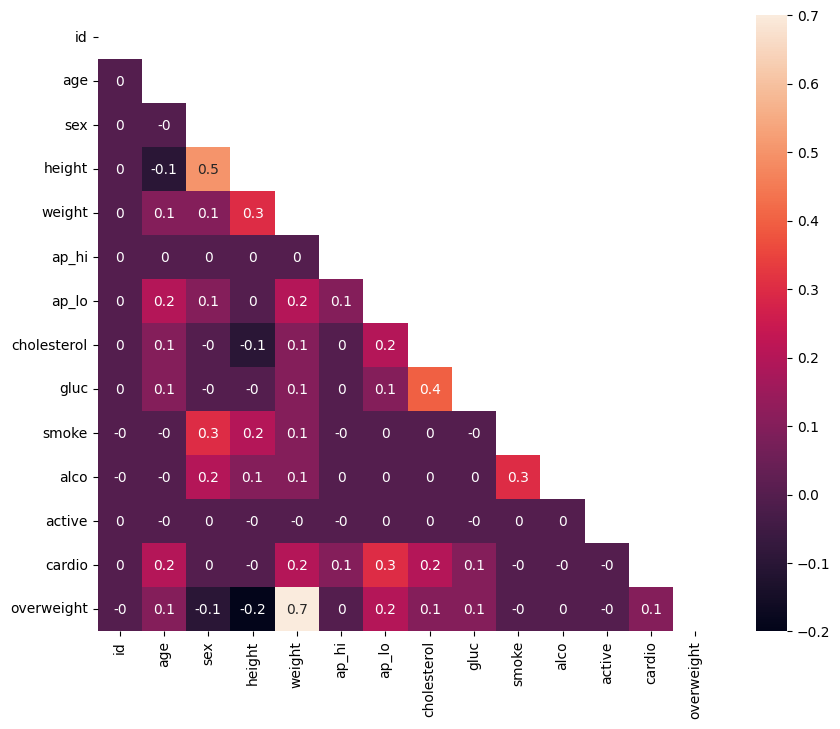

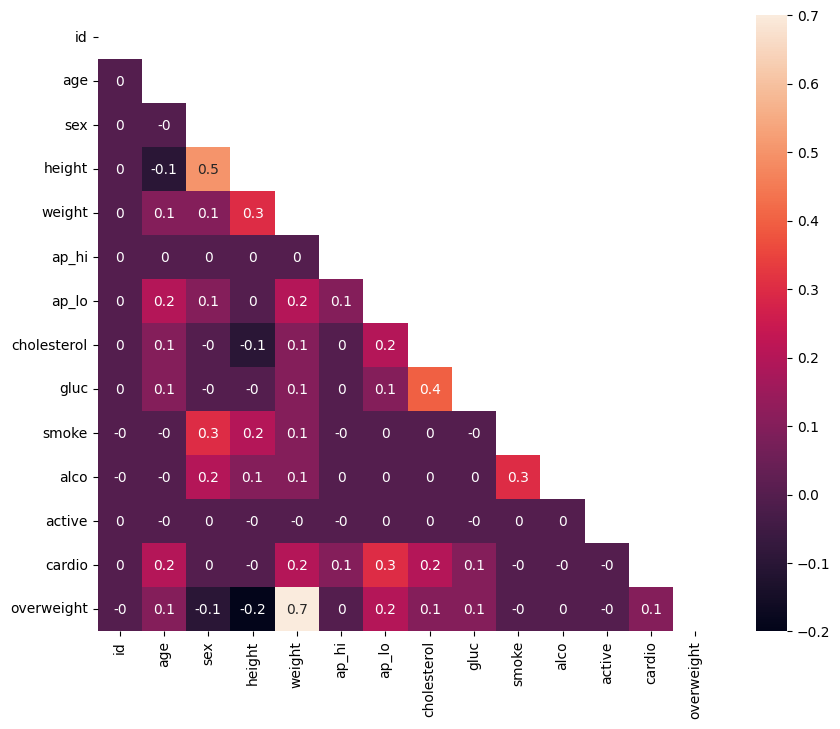

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv', index_col= 'id')

def calculate_BMI(row):
    #   Convert to Meters
    height_meters = row['height'] * 0.01
    bmi = round((row['weight'] / (height_meters ** 2)), 2)
    return bmi

#   Formatting a few categories
df['BMI'] = df.apply(calculate_BMI, axis= 1)
df['overweight'] = df['BMI'] >= 25
df['overweight'] = df['overweight'].astype(int)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df = df.reset_index()
# Drawing the first plot
def draw_cat_plot():
    df_cat = pd.melt(df,
                        id_vars= 'cardio', 
                        value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                        var_name= 'variable',
                        value_name= 'value'
                        )
    df_grouped = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name= 'count')

    fig = sns.catplot(df_grouped, x= 'variable', y= 'count', col= 'cardio', hue= 'value', kind= 'bar')
    fig.savefig('catplot.png')
    return fig

# Drawing the second plot
def draw_heat_map():
    lower_height = df['height'].quantile(0.025)
    upper_height = df['height'].quantile(0.975)
    lower_weight = df['weight'].quantile(0.025)
    upper_weight = df['weight'].quantile(0.975)

    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= lower_height) &
        (df['height'] <= upper_height) &
        (df['weight'] >= lower_weight) &
        (df['weight'] <= upper_weight)
    ]
    df_heat = df_heat.drop('BMI', axis= 1)

    corr = df_heat.corr().round(1)
    mask = np.triu(np.ones_like(corr, dtype= bool))

    fig, ax = plt.subplots(figsize= (10, 8))
    sns.heatmap(corr, mask= mask, annot= True, ax= ax)

    fig.savefig('heatmap.png')
    return fig

draw_heat_map()

In [17]:
lower_height = df['height'].quantile(0.025)
upper_height = df['height'].quantile(0.975)
lower_weight = df['weight'].quantile(0.025)
upper_weight = df['weight'].quantile(0.975)

df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= lower_height) &
    (df['height'] <= upper_height) &
    (df['weight'] >= lower_weight) &
    (df['weight'] <= upper_weight)
]
df.columns.unique()

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI', 'overweight'],
      dtype='object')

In [24]:
df = pd.read_csv('medical_examination.csv', index_col= 'id')

df.reset_index()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
lower_height = df['height'].quantile(0.025)
upper_height = df['height'].quantile(0.975)
lower_weight = df['weight'].quantile(0.025)
upper_weight = df['weight'].quantile(0.975)

df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= lower_height) &
    (df['height'] <= upper_height) &
    (df['weight'] >= lower_weight) &
    (df['weight'] <= upper_weight)
]

corr = df_heat.corr()
corr

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
age,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267,0.089328
sex,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135596,-0.054000
height,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266307,-0.152383
weight,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862654,0.653143
ap_hi,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024924,0.017194
ap_lo,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.216789,0.171817
cholesterol,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.167415,0.128022
gluc,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121936,0.087764
smoke,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041660,-0.003494
alco,-0.026970,0.168637,0.089785,0.059917,0.000769,0.033042,0.038446,0.014297,0.341200,1.000000,0.025847,-0.011088,0.012358,0.025257


In [4]:
lower_height = df['height'].quantile(0.025)
upper_height = df['height'].quantile(0.975)
lower_weight = df['weight'].quantile(0.025)
upper_weight = df['weight'].quantile(0.975)

df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= lower_height) &
    (df['height'] <= upper_height) &
    (df['weight'] >= lower_weight) &
    (df['weight'] <= upper_height)
]
df_heat.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.97,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.93,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.51,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.71,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.01,0


In [8]:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
print(len(df['ap_hi']))
diastolic_range = df[df['ap_lo'] <= df['ap_hi']]
filtered_df = df[diastolic_range]
print(len(filtered_df['ap_hi']))


70000


ValueError: Boolean array expected for the condition, not object

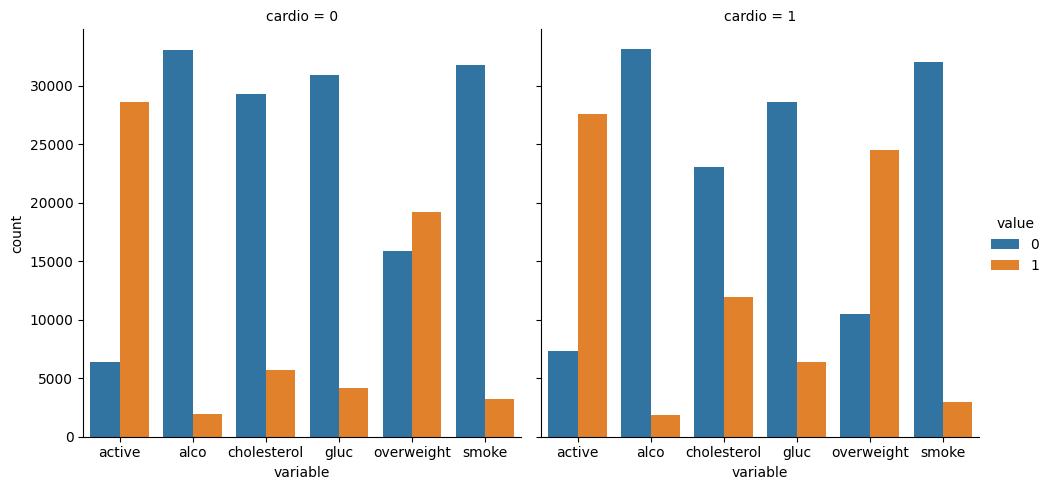

In [37]:
df_cat = pd.melt(df,
                     id_vars= 'cardio', 
                     value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                     var_name= 'variable',
                     value_name= 'value'
                    )

sns.catplot(df_cat, x= 'variable', col= 'cardio', hue= 'value', kind= 'count')

In [30]:
df.describe()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,27.556545,0.624286
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.091405,0.484310
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.470000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.880000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.375000,1.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.220000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298.670000,1.000000


In [12]:
def calculate_BMI(row):
    #   Convert to Meters
    height_meters = row['height'] * 0.01
    bmi = round((row['weight'] / (height_meters ** 2)), 2)
    return bmi

df['BMI'] = df.apply(calculate_BMI, axis= 1)
df['overweight'] = df['BMI'] >= 25
df['overweight'] = df['overweight'].astype(int)


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35,1


In [27]:
df = pd.read_csv('medical_examination.csv', index_col= 'id')